<a href="https://colab.research.google.com/github/Navashakthi/Music-Recommendation-System-Content-Based-Approach-with-Gradio-APP/blob/main/music_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Music Recommendation System Using Content-Based Features

In [1]:
import pandas as pd
import numpy as np
import zipfile
import os

In [2]:
#Downloading the ZIP file
!wget -O musicRec.zip "https://drive.google.com/uc?export=download&id=1bA4Sl1LEbqfCPoigdhZJ5m_bzEHdoJlP"


--2024-11-06 06:49:53--  https://drive.google.com/uc?export=download&id=1bA4Sl1LEbqfCPoigdhZJ5m_bzEHdoJlP
Resolving drive.google.com (drive.google.com)... 142.250.141.102, 142.250.141.101, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bA4Sl1LEbqfCPoigdhZJ5m_bzEHdoJlP&export=download [following]
--2024-11-06 06:49:53--  https://drive.usercontent.google.com/download?id=1bA4Sl1LEbqfCPoigdhZJ5m_bzEHdoJlP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17275602 (16M) [application/octet-stream]
Saving to: ‘musicRec.zip’

musicRec.zip        100%[===================>]  16.47M  51.4

In [3]:
#Unzip the downloaded file
with zipfile.ZipFile("musicRec.zip", "r") as zip_ref:
    zip_ref.extractall("musicRec")


In [4]:
#Loading each CSV file into a pandas DataFrame
data_files = ["data_by_artist", "data_by_genres", "data_by_year", "data_w_genres", "data"]
dataframes = {}

for file in data_files:
    file_path = "/content/musicRec/data/" + f"{file}.csv"
    dataframes[file] = pd.read_csv(file_path)
    print(f"Loaded {file}.csv with shape {dataframes[file].shape}")


Loaded data_by_artist.csv with shape (28680, 15)
Loaded data_by_genres.csv with shape (2973, 14)
Loaded data_by_year.csv with shape (100, 14)
Loaded data_w_genres.csv with shape (28680, 16)
Loaded data.csv with shape (170653, 19)


#### Overview of Each Dataset
- data_by_artist
- data_by_genres
- data_by_year
- data_w_genres
- data


In [8]:
for name, df in dataframes.items():
    print(f"\n--- Overview of {name}.csv ---")
    print("First few rows:")
    print(df.head(3))
    print("\nData types:")
    print(df.dtypes)
    print("\nBasic statistics:")
    print(df.describe())
    print("\nMissing values per column:")
    print(df.isnull().sum())



--- Overview of data_by_artist.csv ---
First few rows:
   mode  count  acousticness                                      artists  \
0     1      9      0.590111             "Cats" 1981 Original London Cast   
1     1     26      0.862538                    "Cats" 1983 Broadway Cast   
2     1      7      0.856571  "Fiddler On The Roof” Motion Picture Chorus   

   danceability    duration_ms    energy  instrumentalness  liveness  \
0      0.467222  250318.555556  0.394003          0.011400  0.290833   
1      0.441731  287280.000000  0.406808          0.081158  0.315215   
2      0.348286  328920.000000  0.286571          0.024593  0.325786   

    loudness  speechiness       tempo   valence  popularity  key  
0 -14.448000     0.210389  117.518111  0.389500   38.333333    5  
1 -10.690000     0.176212  103.044154  0.268865   30.576923    5  
2 -15.230714     0.118514   77.375857  0.354857   34.857143    0  

Data types:
mode                  int64
count                 int64
acousticn

### Exploratory Data Analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Distribution of Popularity, Tempo, Loudness, and Energy
def plot_distribution(df, features):
    for feature in features:
        plt.figure()
        sns.histplot(df[feature].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

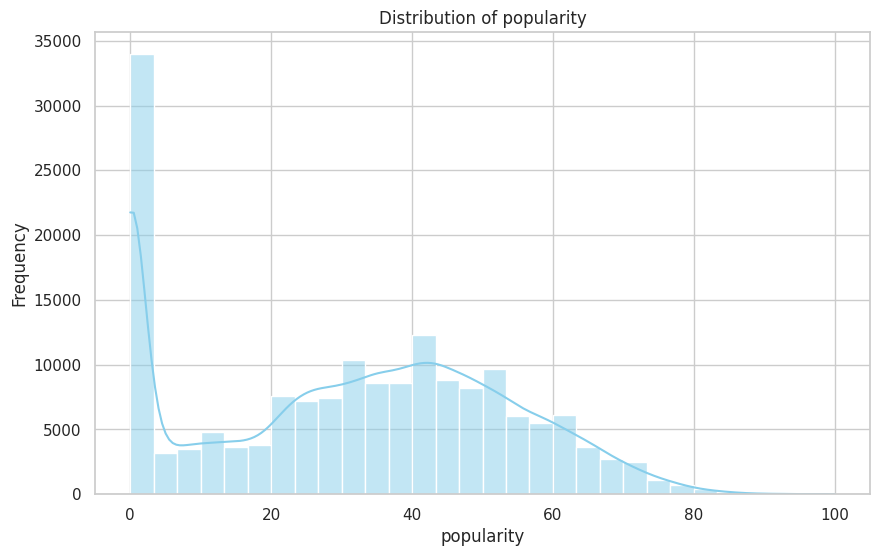

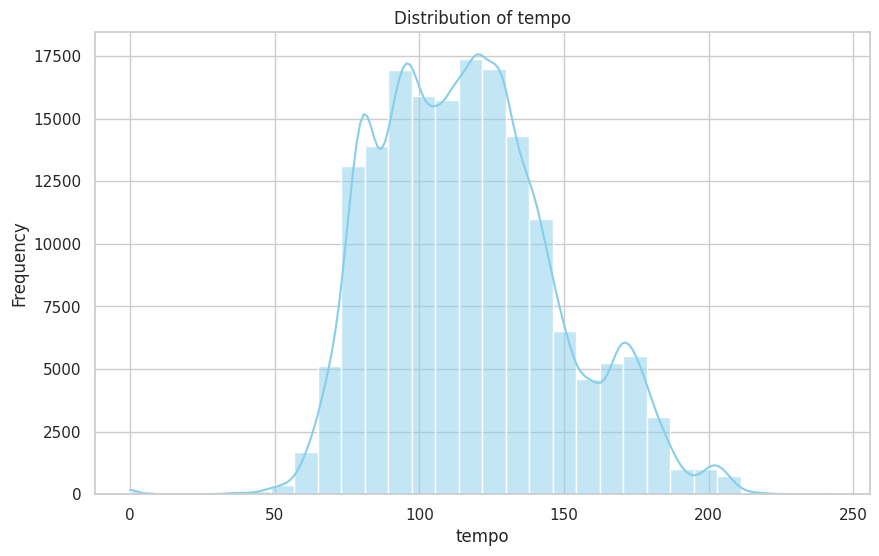

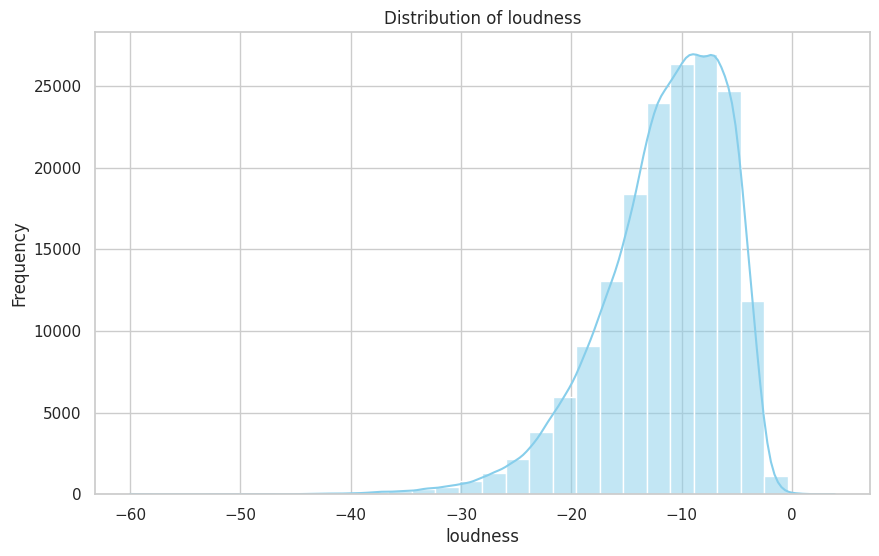

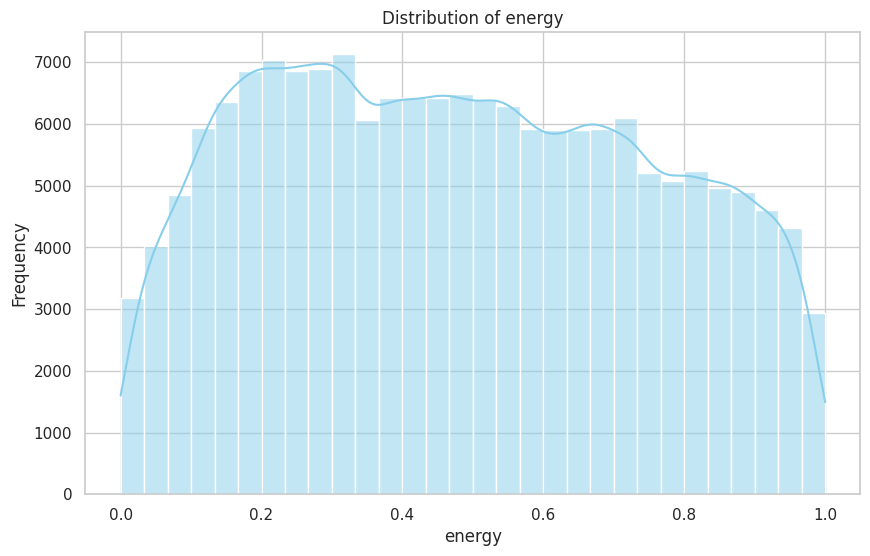

In [ ]:
plot_distribution(dataframes['data'], ['popularity', 'tempo', 'loudness', 'energy'])


In [ ]:
# Genre Analysis: Most Popular Genres and Genre Diversity
def plot_genre_analysis(df, genre_column='genre', popularity_column='popularity'):
    # Top genres by average popularity
    genre_popularity = df.groupby(genre_column)[popularity_column].mean().sort_values(ascending=False).head(10)

    plt.figure()
    genre_popularity.plot(kind='bar', color='coral')
    plt.title("Top 10 Genres by Average Popularity")
    plt.xlabel("Genre")
    plt.ylabel("Average Popularity")
    plt.xticks(rotation=45)
    plt.show()

    # Genre diversity (distribution of genres)
    genre_counts = df[genre_column].value_counts().head(10)

    plt.figure()
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
    plt.title("Genre Distribution (Top 10 Genres)")
    plt.ylabel("")
    plt.show()


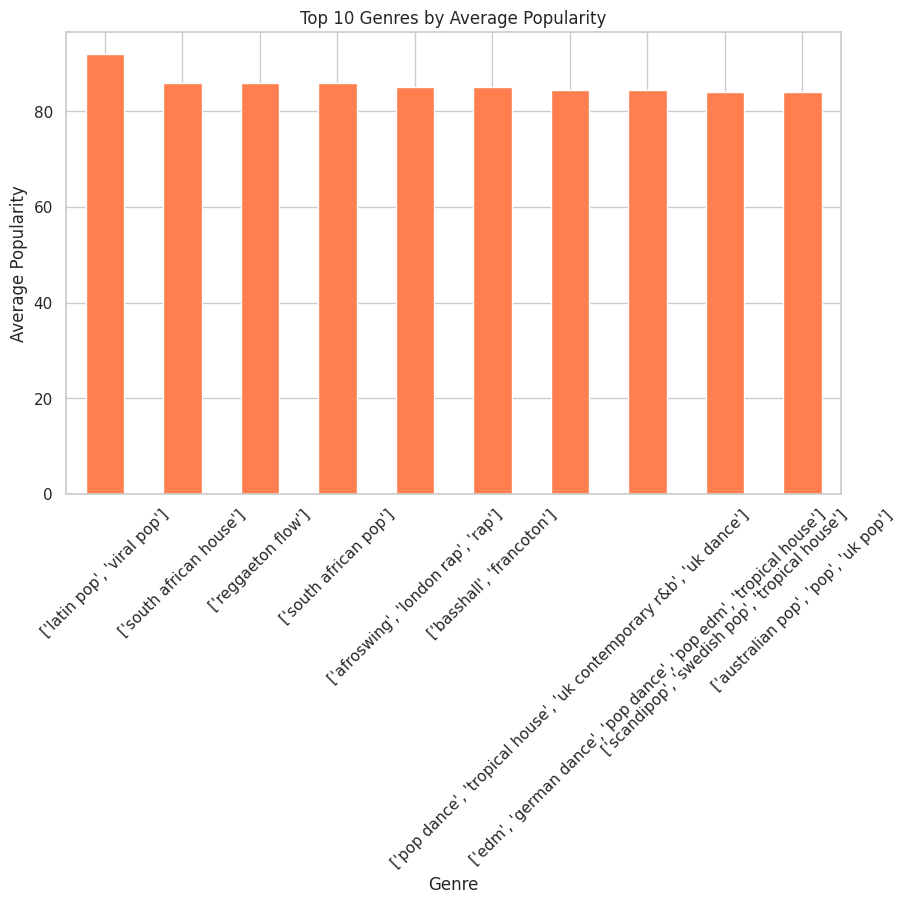

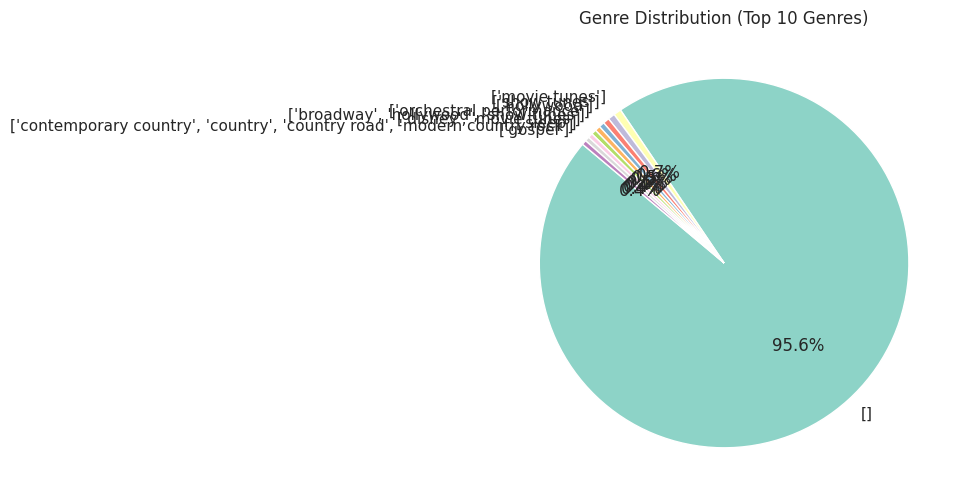

In [ ]:
# Example usage: Analyze genres in data_w_genres.csv
plot_genre_analysis(dataframes['data_w_genres'], genre_column='genres', popularity_column='popularity')

In [ ]:
# Correlation Analysis: Heatmap of Correlations between Features
def plot_correlation_heatmap(df, features):
    corr = df[features].corr()

    plt.figure()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Matrix of Audio Features")
    plt.show()

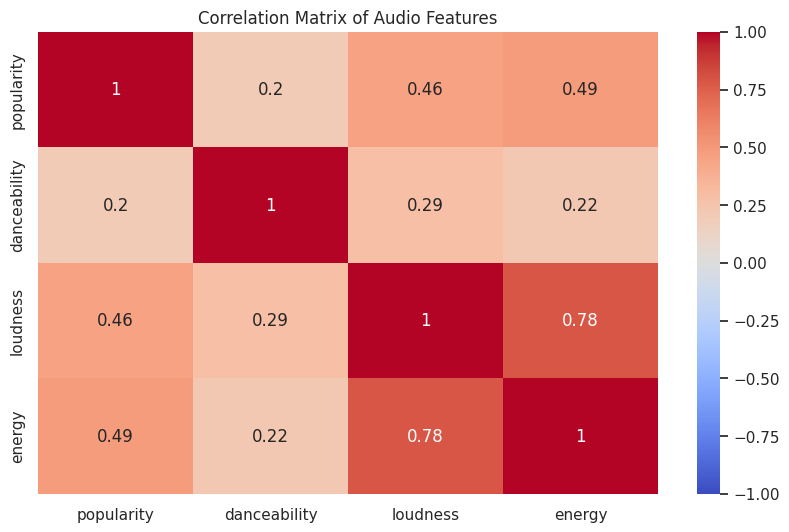

In [ ]:
# Example usage: Correlation between popularity, danceability, loudness, energy
plot_correlation_heatmap(dataframes['data'], ['popularity', 'danceability', 'loudness', 'energy'])

In [ ]:
def plot_boxplot_by_genre(df, features, genre_column='genre'):
    for feature in features:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=genre_column, y=feature)
        plt.title(f"{feature.capitalize()} Distribution by Genre")
        plt.xlabel("Genre")
        plt.ylabel(feature.capitalize())
        plt.xticks(rotation=45, ha="right")
        plt.show()

In [ ]:
# Example usage: Boxplots for 'popularity', 'tempo', 'loudness', and 'energy' by genre in data_w_genres.csv
#plot_boxplot_by_genre(dataframes['data_w_genres'], ['popularity', 'tempo', 'loudness', 'energy'], genre_column='genres')

In [ ]:
def plot_pairplot(df, features):
    sns.pairplot(df[features], diag_kind="kde", plot_kws={'alpha':0.5})
    plt.suptitle("Pair Plot of Key Features", y=1.02)
    plt.show()

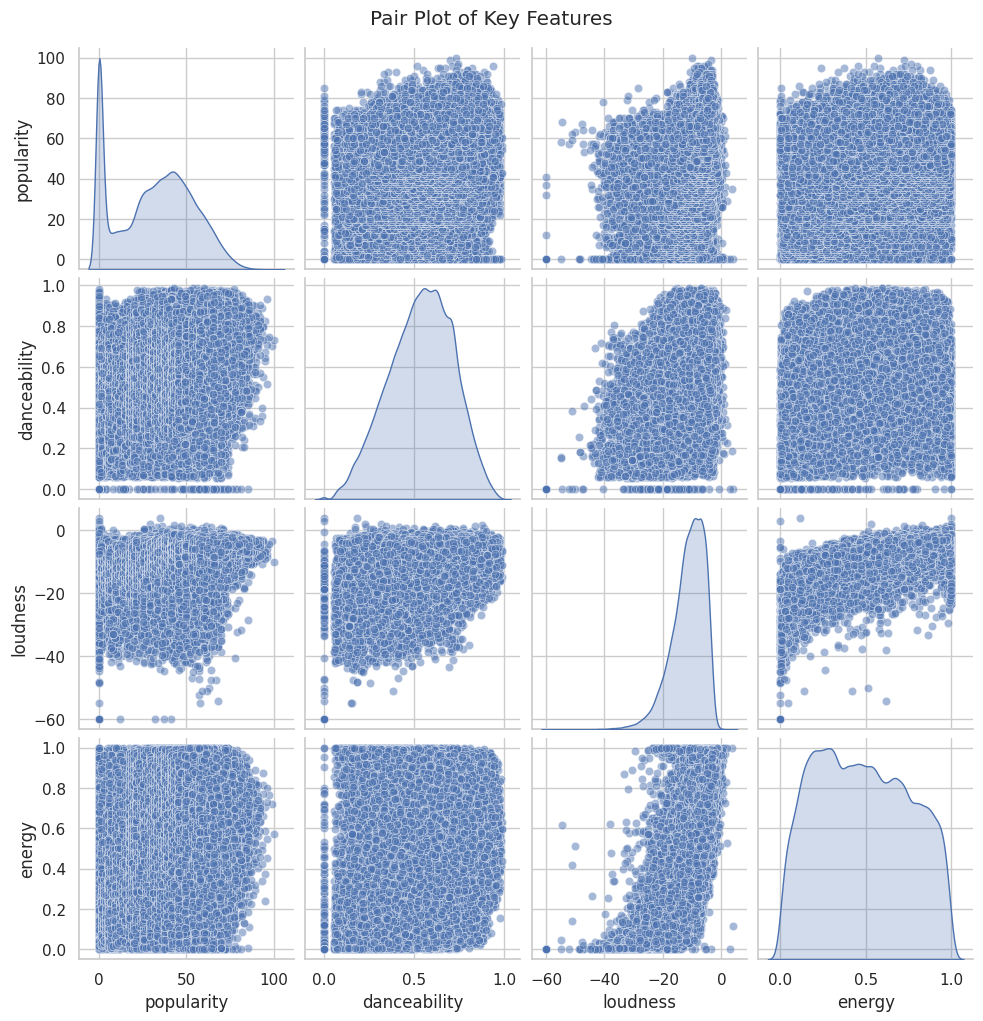

In [ ]:
# Example usage: Pair plot for 'popularity', 'danceability', 'loudness', and 'energy'
plot_pairplot(dataframes['data'], ['popularity', 'danceability', 'loudness', 'energy'])

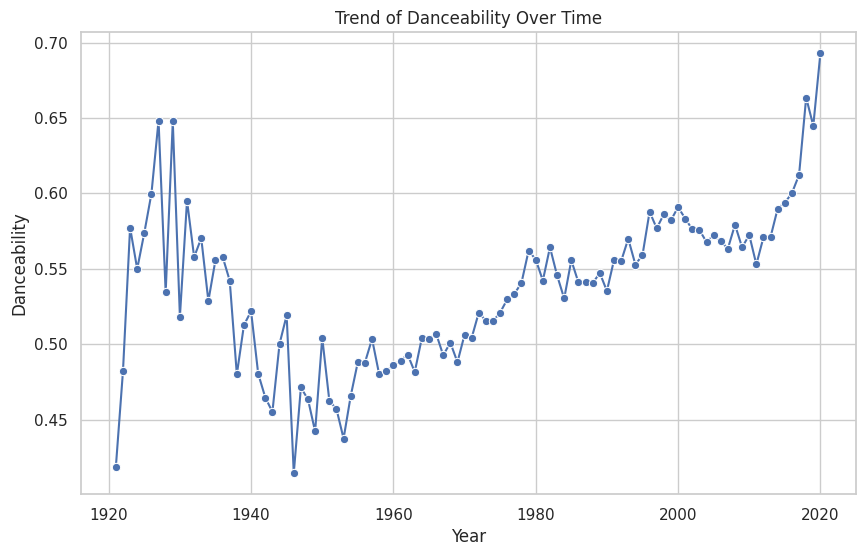

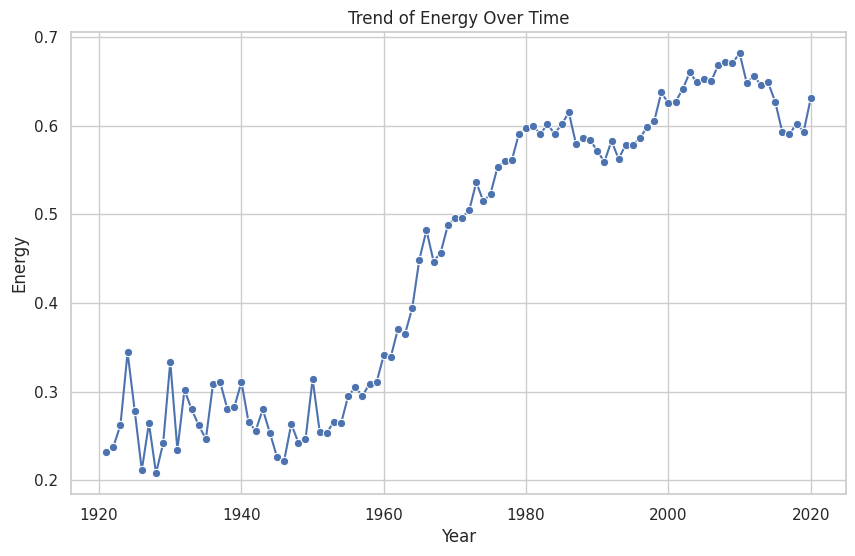

In [ ]:
def plot_feature_trends(df, features, time_column='year'):
    for feature in features:
        plt.figure()
        sns.lineplot(data=df, x=time_column, y=feature, marker="o")
        plt.title(f"Trend of {feature.capitalize()} Over Time")
        plt.xlabel("Year")
        plt.ylabel(feature.capitalize())
        plt.show()

# Example usage: Trends for 'danceability' and 'energy' in data_by_year.csv
plot_feature_trends(dataframes['data_by_year'], ['danceability', 'energy'], time_column='year')

In [ ]:
def plot_genre_cooccurrence_heatmap(df, genre_column='genres'):
    # Split genre string into individual genres (assuming multiple genres are separated by a delimiter like ",")
    genres_expanded = df[genre_column].str.get_dummies(sep=',')
    genre_cooccurrence = genres_expanded.T.dot(genres_expanded)

    plt.figure(figsize=(12, 10))
    sns.heatmap(genre_cooccurrence, cmap="YlGnBu", annot=True, fmt="d")
    plt.title("Genre Co-occurrence Matrix")
    plt.xlabel("Genre")
    plt.ylabel("Genre")
    plt.show()

# Example usage: Genre co-occurrence heatmap in data_w_genres.csv
#plot_genre_cooccurrence_heatmap(dataframes['data_w_genres'], genre_column='genres')


### Content-Based Recommendation System
The most straightforward and effective system. This approach makes good use of your audio features, works independently of user interaction data, and can provide meaningful recommendations based on music characteristics alone.

In [13]:
!pip install -r /content/requirements.txt

ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss


In [9]:
!python /content/app.py

Traceback (most recent call last):
  File "/content/app.py", line 3, in <module>
    import faiss
ModuleNotFoundError: No module named 'faiss'


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = dataframes['data']

# Drop columns not relevant for similarity calculations
data_processed = data.drop(columns=['id', 'name', 'artists', 'release_date'])

# Normalize numerical columns
num_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'popularity']
scaler = MinMaxScaler()
data_processed[num_cols] = scaler.fit_transform(data_processed[num_cols])

# Optional: One-hot encode categorical columns (like `mode` or `explicit` if they are binary)
# For this dataset, `explicit` and `mode` might be retained as-is


In [ ]:
!pip install faiss-cpu  # or `faiss-gpu` if using a GPU runtime

import faiss
import numpy as np

# Convert data to numpy array
data_array = data_processed[num_cols].values.astype('float32')  # Faiss requires float32

# Create the Faiss index
index = faiss.IndexFlatL2(data_array.shape[1])  # L2 distance
index.add(data_array)  # Add data to the index

# Define function to get recommendations
def recommend_songs_faiss(song_name, data, index, top_n=5):
    # Get the index of the song in the dataset
    song_idx = data[data['name'] == song_name].index[0]
    song_vector = data_array[song_idx].reshape(1, -1)

    # Search for nearest neighbors
    _, indices = index.search(song_vector, top_n + 1)  # Get top_n + 1 because the first is the song itself
    song_indices = indices[0][1:]  # Exclude the input song

    # Get recommended song names and artists
    recommended_songs = [(data.iloc[i]['name'], data.iloc[i]['artists']) for i in song_indices]
    rec_df = pd.DataFrame(recommended_songs, columns=["Song Name", "Artists"])
    return rec_df


In [ ]:
# Example usage
song_name = "Danny Boy"  # Replace with an actual song name from your data
recommended_songs = recommend_songs_faiss(song_name, data, index)
recommended_songs

,Song Name,Artists
0,Giola Giola,['Mixalis Thomakos']
1,Diati Ah Diati,['Dimitris Filipopoulos']
2,Small Day Tomorrow,['Andrea Wolper']
3,Plakiotiki Kithara,['Panos Visvardis']
4,Luna rossa,['Claudio Villa']


In [ ]:
data['name'].head(2)

,name
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,Clancy Lowered the Boom


In [ ]:
import pandas as pd
import numpy as np
import faiss
import gradio as gr

# Load your dataset
data = pd.read_csv("/content/musicRec/data/data.csv")  # Replace with your actual file path

# Specify the numerical columns used for recommendations
num_cols = ['valence', 'acousticness', 'danceability', 'duration_ms',
            'energy', 'instrumentalness', 'liveness',
            'loudness', 'speechiness', 'tempo']  # Adjust as needed

# Preprocess the data
data_processed = data[num_cols]

# Convert data to numpy array
data_array = data_processed.values.astype('float32')  # FAISS requires float32

# Create the FAISS index
index = faiss.IndexFlatL2(data_array.shape[1])  # L2 distance
index.add(data_array)  # Add data to the index

# Define the recommendation function
def recommend_songs_faiss(song_name, top_n=5):
    # Check if the song exists in the dataset
    if song_name not in data['name'].values:
        return f"Song '{song_name}' not found in the dataset."

    # Get the index of the song in the dataset
    song_idx = data[data['name'] == song_name].index[0]
    song_vector = data_array[song_idx].reshape(1, -1)

    # Search for nearest neighbors
    _, indices = index.search(song_vector, top_n + 1)  # Get top_n + 1 because the first is the song itself
    song_indices = indices[0][1:]  # Exclude the input song

    # Get recommended song names and artists
    recommended_songs = [(data.iloc[i]['name'], data.iloc[i]['artists']) for i in song_indices]
    return recommended_songs

# Gradio interface function
def gradio_interface(song_name):
    recommendations = recommend_songs_faiss(song_name)

    if isinstance(recommendations, str):  # Check if the recommendation is an error message
        return recommendations

    # Create a new DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations, columns=["Song Name", "Artists"])
    return recommendations_df  # Return the DataFrame

# Create the Gradio interface
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(label="Enter a Song Name"),
    outputs=gr.Dataframe(label="Recommended Songs",  headers=["Song Name", "Artists"]),
    title="Music Recommendation System",
    description="Enter the name of a song to get similar song recommendations based on audio features."
)

# Launch the Gradio app
if __name__ == "__main__":
    iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://54f8658e2dbe7719ab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
song_name_to_check = 'danny boy'
song_name_to_check in data['name'].values

False

In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
# Step 2: Set up ngrok authentication
from pyngrok import ngrok

# Set your ngrok authtoken (replace with your actual auth token)
ngrok.set_auth_token("2oRJmJGZZEELHiTkw82FNPk8Cc9_7bRRhg8SJ9PKtLhvdKAsd")  # Replace with your actual auth token

# Step 3: Create your Streamlit app

In [ ]:
import threading
import subprocess

# Start Streamlit in a separate thread
def run_streamlit():
    subprocess.run(["streamlit", "run", "/content/sample_data/app.py", "--server.port", "8501", "--server.headless", "true"])

# Start the Streamlit app thread
thread = threading.Thread(target=run_streamlit)
thread.start()

# Start ngrok to create a public URL for the Streamlit app
public_url = ngrok.connect(8501)  # Use the correct port for Streamlit
print("Streamlit app is live at:", public_url)


Streamlit app is live at: NgrokTunnel: "https://12be-34-172-167-72.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
ngrok.disconnect(public_url)  # Replace public_url with your actual ngrok URL if you stored it


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
import pandas as pd
import gradio as gr
import numpy as np
import faiss

# Load and preprocess your dataset
data = pd.read_csv("/content/musicRec/data/data.csv")  # Adjust the path as necessary

# Select the numerical columns for FAISS processing
num_cols = ['valence', 'acousticness', 'danceability', 'duration_ms',
            'energy', 'instrumentalness', 'liveness',
            'loudness', 'speechiness', 'tempo']  # Adjust as needed
data_processed = data[num_cols]

# Convert data to numpy array
data_array = data_processed.values.astype('float32')  # FAISS requires float32

# Create the FAISS index
index = faiss.IndexFlatL2(data_array.shape[1])  # L2 distance
index.add(data_array)  # Add data to the index

# Define function to get recommendations
def recommend_songs_faiss(song_name, top_n=5):
    # Check if the song exists in the dataset
    if song_name not in data['name'].values:
        return f"Song '{song_name}' not found in the dataset."

    # Get the index of the song in the dataset
    song_idx = data[data['name'] == song_name].index[0]
    song_vector = data_array[song_idx].reshape(1, -1)

    # Search for nearest neighbors
    _, indices = index.search(song_vector, top_n + 1)  # Get top_n + 1 because the first is the song itself
    song_indices = indices[0][1:]  # Exclude the input song

    # Ensure song_indices are valid
    if len(song_indices) == 0:
        return "No recommendations found."

    # Get recommended song names and artists
    recommended_songs = [(data.iloc[i]['name'], data.iloc[i]['artists']) for i in song_indices]
    return pd.DataFrame(recommended_songs, columns=["Song Name", "Artist"])

# Create the Gradio interface
iface = gr.Interface(
    fn=recommend_songs_faiss,
    inputs=gr.Textbox(label="Enter a Song Name"),
    outputs=gr.Dataframe(label="Recommended Songs", headers=["Song Name"]),
    title="Music Recommendation System",
    description="Enter the name of a song to get similar song recommendations based on audio features."
)

# Launch the Gradio app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1fcb5f2865082c132c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
def recommend_songs_faiss(song_name, top_n=5):
    # Check if the song exists in the dataset
    if song_name not in data['name'].values:
        return f"Song '{song_name}' not found in the dataset."

    # Get the index of the song in the dataset
    song_idx = data[data['name'] == song_name].index[0]
    song_vector = data_array[song_idx].reshape(1, -1)

    # Search for nearest neighbors
    _, indices = index.search(song_vector, top_n + 1)  # Get top_n + 1 because the first is the song itself
    song_indices = indices[0][1:]  # Exclude the input song

    # Get recommended song names and artists
    recommended_songs = [(data.iloc[i]['name'], data.iloc[i]['artists']) for i in song_indices]
    return recommended_songs

In [ ]:
song_to_test = "danny boy"  # Replace with an actual song name from your dataset
recommendations = recommend_songs_faiss(song_to_test)

print(f"Recommendations for '{song_to_test}':")
    for song, artist in recommendations:
        print(f" - {song} by {artist}")

IndentationError: unexpected indent (<ipython-input-23-406e9d00fd70>, line 5)

In [ ]:
recommendations

"Song 'danny boy' not found in the dataset."

In [ ]:
data = pd.read_csv("/content/musicRec/data/data.csv")

In [ ]:
# List all files in the current working directory and subdirectories
!find /content -name "data.csv"


/content/musicRec/data/data.csv


In [ ]:
!streamlit run /content/sample_data/app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.19.116.174:8501

  Stopping...
^C


In [ ]:
# Selecting a dataset to work with for the recommendation model
# Assuming 'data' contains song data with unique song IDs and attributes
songs_df = dataframes['data']

In [ ]:
songs_df.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339


In [ ]:
songs_df['popularity'].unique()

array([  4,   5,   3,   2,   6,   0,   1,  42,  29,  32,  26,  24,  27,
        22,  20,  18,  17,  13,  12,  11,  10,  16,   9,   8,   7,  37,
        30,  23,  15,  14,  49,  45,  28,  19,  21,  41,  35,  51,  47,
        38,  34,  52,  55,  48,  25,  36,  31,  64,  53,  40,  39,  33,
        46,  44,  54,  43,  60,  76,  57,  70,  56,  69,  71,  66,  61,
        50,  62,  67,  58,  63,  59,  68,  74,  72,  65,  73,  81,  75,
        78,  77,  83,  80,  85,  79,  82,  89,  84,  88,  87,  86,  90,
        94,  91,  92,  99,  95,  96,  93, 100,  97])

In [ ]:
songs_df[songs_df['id'] == "4BJqT0PrAfrxzMOxytFOIz"]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954


In [ ]:
songs_df[songs_df.duplicated(subset='name', keep=False)]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
7,0.0731,1921,0.99300,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.3630,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
11,0.5780,1921,0.99400,['Ignacio Corsini'],0.378,155413,0.115,0,0F30WM8qRpO8kdolepZqdM,0.906000,10,0.1100,-27.039,0,Por Que Me Dejaste - Remasterizado,0,1921-03-20,0.0414,70.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170631,0.3270,2020,0.21700,['YoungBoy Never Broke Again'],0.485,156077,0.814,1,3qHgGyJY4GpXNOK4WL4NSo,0.000000,9,0.1120,-3.907,1,Red Eye,63,2020-02-21,0.1380,159.894
170635,0.1580,2020,0.54100,['Chris Renzema'],0.292,254107,0.355,0,5XBbvUfLSFAT5Rh8eudY8G,0.000000,5,0.0931,-7.225,1,Springtime,63,2020-04-24,0.0294,71.041
170640,0.6940,2020,0.06990,"['Loud Luxury', 'Frank Walker', 'Stephen Puth']",0.759,176389,0.845,0,5seWZTjT0U8a7cy3Y5NJQ9,0.000087,6,0.2150,-6.794,0,Like Gold,69,2020-10-30,0.0421,124.000
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029


In [ ]:
# Step 4: Prepare user-item interaction data
# Simulate user interactions - here, we create synthetic interactions based on popularity
songs_df['user_id'] = (songs_df['popularity'] % 10).astype(str)  # Simulated user IDs
songs_df['interaction'] = 1  # Simulate that users liked these songs


In [ ]:
# Step 5: Prepare content-based features
# We'll use song attributes as item features
item_features_columns = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']


In [ ]:
# Normalize item features
for col in item_features_columns:
    songs_df[col] = (songs_df[col] - songs_df[col].min()) / (songs_df[col].max() - songs_df[col].min())


In [ ]:
!pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808331 sha256=3dcef92a4ba2b237681468edec76cec93814d97327006a8a885ab49c8372f130
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data =

# Drop columns not relevant for similarity calculations
data_processed = data.drop(columns=['id', 'name', 'artists', 'release_date'])

# Normalize numerical columns
num_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'popularity']
scaler = MinMaxScaler()
data_processed[num_cols] = scaler.fit_transform(data_processed[num_cols])

# Optional: One-hot encode categorical columns (like `mode` or `explicit` if they are binary)
# For this dataset, `explicit` and `mode` might be retained as-is


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
# Step 6: Create LightFM dataset
from lightfm import LightFM
from lightfm.data import Dataset
from scipy.sparse import csr_matrix
dataset = Dataset()


In [ ]:
# Register users and items
dataset.fit(users=songs_df['user_id'].unique(), items=songs_df['id'].unique())
# Register item feature names only (without values)
dataset.fit_partial(items=songs_df['id'].unique(), item_features=item_features_columns)


In [ ]:
# Step 7: Build interactions and weights from the user-item interactions
(interactions, weights) = dataset.build_interactions(
    [(row['user_id'], row['id'], row['interaction']) for idx, row in songs_df.iterrows()]
)


In [ ]:
# Step 8: Build item features matrix using feature names only
item_features_list = [
    (row['id'], item_features_columns)  # Assign feature names without values
    for _, row in songs_df.iterrows()
]
item_features = dataset.build_item_features(item_features_list)


In [ ]:
# Step 9: Train a LightFM model
model = LightFM(loss='warp')  # Using WARP (Weighted Approximate-Rank Pairwise) for ranking
model.fit(interactions, item_features=item_features, epochs=30, num_threads=2)


In [ ]:
# Verify that items and users are properly mapped
user_mapping = dataset.mapping()[0]
item_mapping = dataset.mapping()[2]
print("User mapping (first 5 entries):", list(user_mapping.items())[:5])
print("Item mapping (first 5 entries):", list(item_mapping.items())[:5])

# Ensure that user_id exists in user_mapping
user_id = '5'  # Example user ID
if user_id not in user_mapping:
    print(f"User {user_id} not found in the mapping. Please check available users.")
else:
    print(f"User {user_id} is in the mapping and ready for recommendations.")

# Define recommendation function with additional debug info
# Define a recommendation function with a fallback if no high-score items are found
def recommend_songs_with_fallback(model, dataset, user_id, n_rec=5):
    user_index = dataset.mapping()[0][user_id]
    item_mapping = dataset.mapping()[2]
    n_items = len(item_mapping)

    # Predict scores for all items for the user
    scores = model.predict(user_index, np.arange(n_items), item_features=item_features)

    # Sort by score to get top recommendations
    top_items = np.argsort(-scores)[:n_rec]
    song_ids = [item_mapping[item] for item in top_items if item in item_mapping]

    # Fallback: If no recommendations found, suggest popular items or items with the highest average scores
    if not song_ids:
        print("No personalized recommendations available. Using fallback.")
        fallback_items = np.argsort(-interactions.sum(axis=0).A1)[:n_rec]
        song_ids = [item_mapping[item] for item in fallback_items if item in item_mapping]

    return song_ids

# Train model with more epochs for improved recommendations
model = LightFM(loss='bpr')
model.fit(interactions, item_features=item_features, epochs=100, num_threads=4)


# Try getting recommendations with fallback
recommended_songs = recommend_songs_with_fallback(model, dataset, user_id, n_rec=5)
print(f"Recommended songs for user {user_id}: {recommended_songs}")


#Print scores for the first few items to verify predictions
user_index = dataset.mapping()[0][user_id]
scores = model.predict(user_index, np.arange(len(item_mapping)), item_features=item_features)
print(f"Prediction scores for user {user_id} across items: {scores[:10]}")


User mapping (first 5 entries): [('4', 0), ('5', 1), ('3', 2), ('2', 3), ('6', 4)]
Item mapping (first 5 entries): [('4BJqT0PrAfrxzMOxytFOIz', 0), ('7xPhfUan2yNtyFG0cUWkt8', 1), ('1o6I8BglA6ylDMrIELygv1', 2), ('3ftBPsC5vPBKxYSee08FDH', 3), ('4d6HGyGT8e121BsdKmw9v6', 4)]
User 5 is in the mapping and ready for recommendations.
No personalized recommendations available. Using fallback.
Recommended songs for user 5: []
Prediction scores for user 5 across items: [-65.45537  -59.579967 -59.640404 -64.34008  -64.039955 -63.90856
 -65.73067  -63.95924  -65.700775 -65.62375 ]


In [ ]:
# Check the number of interactions for each user to see if they have enough data
interaction_counts = interactions.getnnz(axis=1)  # Number of non-zero interactions per user
print(f"Number of interactions for each user: {interaction_counts}")
print(f"Total interactions: {interaction_counts.sum()}")


Number of interactions for each user: [14556 14043 14886 15242 13864 41264 16331 13467 13719 13281]
Total interactions: 170653


In [ ]:
# Step 10: Define a function to recommend songs for a user
def recommend_songs(model, dataset, user_id, n_rec=5):
    user_index = dataset.mapping()[0][user_id]  # Map user_id to internal index
    item_mapping = dataset.mapping()[2]  # Retrieve item mapping from dataset
    n_items = len(item_mapping)  # Get the actual number of items registered

    # Predict scores for all items for the user, using the correct item range
    scores = model.predict(user_index, np.arange(n_items), item_features=item_features)

    # Get top N items (songs) based on scores
    top_items = np.argsort(-scores)[:n_rec]

    # Map internal item indices back to song IDs
    song_ids = [item_mapping[item] for item in top_items if item in item_mapping]
    return song_ids


In [ ]:
# Verify that items and users are properly mapped
user_mapping = dataset.mapping()[0]
item_mapping = dataset.mapping()[2]
print("User mapping (first 5 entries):", list(user_mapping.items())[:5])
print("Item mapping (first 5 entries):", list(item_mapping.items())[:5])

User mapping (first 5 entries): [('4', 0), ('5', 1), ('3', 2), ('2', 3), ('6', 4)]
Item mapping (first 5 entries): [('4BJqT0PrAfrxzMOxytFOIz', 0), ('7xPhfUan2yNtyFG0cUWkt8', 1), ('1o6I8BglA6ylDMrIELygv1', 2), ('3ftBPsC5vPBKxYSee08FDH', 3), ('4d6HGyGT8e121BsdKmw9v6', 4)]


In [ ]:
# Step 10: Define a function to recommend songs for a user
def recommend_songs(model, dataset, user_id, n_rec=5):
    user_index = dataset.mapping()[0][user_id]  # Map user_id to internal index
    item_mapping = dataset.mapping()[2]  # Retrieve item mapping from dataset
    n_items = len(item_mapping)  # Get the actual number of items registered

    # Predict scores for all items for the user, using the correct item range
    scores = model.predict(user_index, np.arange(n_items), item_features=item_features)

    # Get top N items (songs) based on scores
    top_items = np.argsort(-scores)[:n_rec]

    # Map internal item indices back to song IDs
    song_ids = [item_mapping[item] for item in top_items if item in item_mapping]
    return song_ids

# Example recommendation for a user
user_id = '2'  # Example user ID
recommended_songs = recommend_songs(model, dataset, user_id, n_rec=5)
print(f"Recommended songs for user {user_id}: {recommended_songs}")


Recommended songs for user 2: []


In [ ]:
songs_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,user_id,interaction
0,0.0594,1921,0.985944,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.282389,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,0.624916,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.037732,0.332450,4,1
1,0.9630,1921,0.734940,['Dennis Day'],0.828947,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,0.744797,1,Clancy Lowered the Boom,5,1921,0.427835,0.250243,5,1
2,0.0394,1921,0.964859,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.331984,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,0.707071,1,Gati Bali,5,1921,0.034948,0.453125,5,1
3,0.1650,1921,0.970884,['Frank Parker'],0.278340,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,0.793736,1,Danny Boy,3,1921,0.036495,0.411113,3,1
4,0.2530,1921,0.960843,['Phil Regan'],0.423077,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,0.781521,1,When Irish Eyes Are Smiling,2,1921,0.039175,0.417503,2,1


Given the data fields available, here’s how each option might perform and which option would likely be best suited:

### Option Analysis

1. **Option A: Content-Based Music Recommendation System**
   - **How it Works**: This system uses features like `valence`, `danceability`, `energy`, `acousticness`, and other audio attributes to calculate similarity between songs.
   - **Advantages with Provided Data**:
     - Since you have detailed audio features for each song, a content-based approach can work effectively without user listening data.
     - Features like `popularity`, `year`, and `genre` information (if derived from `artists`) can help create a diverse recommendation base.
   - **Disadvantages**:
     - Limited in personalization; while this system can recommend similar songs, it doesn’t take user preferences into account unless they actively select a specific song.
   - **Best Use Case**: For a music discovery app, where users can find songs similar to ones they already enjoy.

2. **Option B: Hybrid Music Recommendation System (Collaborative Filtering + Content-Based)**
   - **How it Works**: Combines collaborative filtering (based on user interaction data) with content features (like the audio attributes in your data) to recommend songs.
   - **Advantages with Provided Data**:
     - If you have user listening history or behavioral data (e.g., from a different dataset), this approach can balance user tastes with audio similarities.
     - Provides a more personalized experience, even for users who haven’t interacted extensively with the app, by using audio features as fallbacks.
   - **Disadvantages**:
     - Requires user interaction data, which is not provided in the `data.csv` file you described. Without collaborative filtering data, this hybrid system defaults to a content-based recommendation.
   - **Best Use Case**: When both user interaction and audio data are available for a highly personalized system.

3. **Option C: Deep Learning-Based Personalized Playlist Recommendation**
   - **How it Works**: A neural network, such as an autoencoder, could be trained to generate song embeddings based on the audio features. This embedding could then recommend songs based on similar latent characteristics.
   - **Advantages with Provided Data**:
     - If trained on audio features alone, it can capture complex relationships between features and provide nuanced recommendations.
     - Potentially good for a playlist recommendation approach, where similar “vibes” can be matched based on deep embeddings.
   - **Disadvantages**:
     - Computationally intensive and may require substantial resources and tuning to achieve good performance without additional user preference data.
     - For deep learning models to be highly effective, user interaction data or playlists would enhance its effectiveness.
   - **Best Use Case**: For advanced personalization when computational resources are available.

### Recommendation

Given the fields in your dataset, **Option A: Content-Based Recommendation System** would be the most straightforward and effective choice. This approach makes good use of your audio features, works independently of user interaction data, and can provide meaningful recommendations based on music characteristics alone.

If you’re able to obtain user interaction data in the future, a hybrid approach (Option B) could enhance personalization. However, with the current dataset, Option A is the most feasible and would deliver relevant music recommendations based on content features.

Let me know if you'd like guidance on implementing Option A with the data!